In [ ]:
# Install necessary Libraries
!pip install scikit-learn pandas numpy matplotlib seaborn


Training Accuracy: 0.8094462540716613


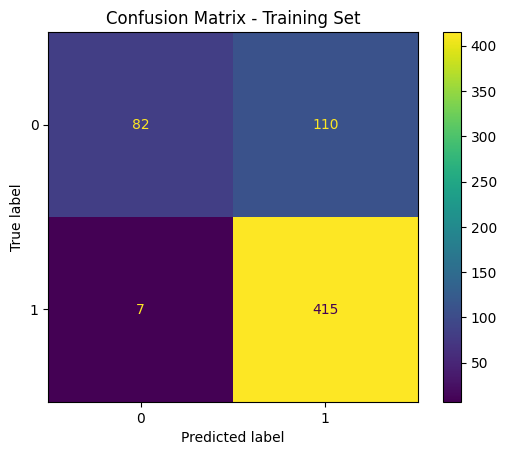

✅ Submission file saved as 'loan_predictions_submission.csv'


In [3]:
# 📦 Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 📂 Step 2: Load Datasets
train_df = pd.read_csv("datasets/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("datasets/test_Y3wMUE5_7gLdaTN.csv")

# 🧹 Step 3: Drop 'Loan_ID' and Separate Target
X_train_raw = train_df.drop(columns=["Loan_ID", "Loan_Status"])
y_train = train_df["Loan_Status"]

# Save test IDs for submission
test_ids = test_df["Loan_ID"]
X_test_raw = test_df.drop(columns=["Loan_ID"])

# 🔄 Step 4: Concatenate for Consistent Preprocessing
combined = pd.concat([X_train_raw, X_test_raw], axis=0)

# 🧼 Step 5: Impute Missing Values
imputer = SimpleImputer(strategy='most_frequent')
combined_imputed = pd.DataFrame(imputer.fit_transform(combined), columns=combined.columns)

# Split back into train and test sets
X_train = combined_imputed.iloc[:len(X_train_raw), :].copy()
X_test = combined_imputed.iloc[len(X_train_raw):, :].copy()

# 🔠 Step 6: Encode Categorical Features Safely
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train = pd.DataFrame(encoder.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(encoder.transform(X_test), columns=X_test.columns)

# 🎯 Step 7: Encode Target Variable
y_train = y_train.map({'N': 0, 'Y': 1})

# 🤖 Step 8: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📈 Step 9: Evaluate on Training Data
y_pred_train = model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.title("Confusion Matrix - Training Set")
plt.show()

# 🔍 Step 10: Predict on Test Set
test_preds = model.predict(X_test)
predicted_labels = ['Y' if pred == 1 else 'N' for pred in test_preds]

# 💾 Step 11: Save Predictions to CSV
submission_df = pd.DataFrame({
    "Loan_ID": test_ids,
    "Loan_Status": predicted_labels
})
submission_df.to_csv("loan_predictions_submission.csv", index=False)
print("✅ Submission file saved as 'loan_predictions_submission.csv'")
